In [1]:
## Import the required libraries and set the default file logging settings for the program. 
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import make_column_transformer
    from sklearn.feature_selection import RFE
    pd.set_option("display.max_rows", None)
    pd.options.mode.chained_assignment = None
    import ipywidgets as widgets
    from IPython.display import display, clear_output
    enable_nbextensions=True
    import pickle
    import _pickle
    import datetime
    import logging
    import bz2
    logging.basicConfig(level=logging.WARNING, format= "{asctime},{levelname:<8},{message}",
                                    style="{", filename = "user_log.log", filemode = "a")
except:
    logging.basicConfig(level=logging.WARNING, format= "{asctime},{levelname:<8},{message}",
                                    style="{", filename = "user_log.log", filemode = "a")
    logging.warning("Exception occured in the external library importing section of the program.")

In [2]:
# # Read in the manually modified dataset and delete unused data columns.

# car_prices = pd.read_csv("car_prices.csv", low_memory=True)
# del car_prices["vin"]
# del car_prices["saledate"]
# del car_prices["seller"]
# del car_prices["trim"]
# del car_prices["body"]
# del car_prices["interior"]
# car_prices["mmr"] = pd.to_numeric(car_prices["mmr"])        
# car_prices = car_prices.dropna()
# car_prices = car_prices.sort_values(by=['year'], ascending = True)
# print(car_prices.head())

In [3]:
# %%time
# # Remove any cars from the dataset which were made before 2005. Additionally, remove half of the data from every year.
## This is done to reduce the size of the dataset to comply with restrictions from github that all uploaded files be 
## 25MB or less in size while still making the program as efficient as possible.

# car_prices = car_prices[car_prices["year"] >= 2005]
# all_years = list(car_prices["year"])
# all_makes = list(car_prices["make"])
# all_models = list(car_prices["model"])
# all_transmissions = list(car_prices["transmission"])
# all_states = list(car_prices["state"])
# all_conditions = list(car_prices["condition"])
# all_odometers = list(car_prices["odometer"])
# all_colors = list(car_prices["color"])
# all_mmrs = list(car_prices["mmr"])
# all_sellingprices = list(car_prices["sellingprice"])
# num_each_year = []
# counter = 0
# start_year = 2005
# end_year = 2015
# temp_all_years = []
# year_holder = []
# make_holder = []
# model_holder = []
# transmission_holder = []
# state_holder = []
# condition_holder = []
# odometer_holder = []
# color_holder = []
# mmr_holder = []
# sellingprice_holder = []
# turns = 0
# while start_year <= end_year:
#     for year in all_years:
#         if int(year) == int(start_year):
#             counter = counter + 1
#     num_each_year.append(counter)
#     counter = 0
#     start_year = start_year + 1
# print(len(all_years))    
# print(num_each_year)
# start_year = 2005
# while len(num_each_year)  > 0:
#     counter = int(num_each_year.pop(0))
#     counter = round(counter/2)
    
#     while counter >= 0:
#         year_holder.append(all_years.pop(0))
#         make_holder.append(all_makes.pop(0))
#         model_holder.append(all_models.pop(0))
#         transmission_holder.append(all_transmissions.pop(0))
#         state_holder.append(all_states.pop(0))
#         condition_holder.append(all_conditions.pop(0))
#         odometer_holder.append(all_odometers.pop(0))
#         color_holder.append(all_colors.pop(0))
#         mmr_holder.append(all_mmrs.pop(0))
#         sellingprice_holder.append(all_sellingprices.pop(0))
#         counter = counter - 1
#     temp_all_years = all_years.copy()    
#     for val in all_years:
#         if int(val) == int(start_year):
#             temp_all_years.pop(0)
#             all_makes.pop(0)
#             all_models.pop(0)
#             all_transmissions.pop(0)
#             all_states.pop(0)
#             all_conditions.pop(0)
#             all_odometers.pop(0)
#             all_colors.pop(0)
#             all_mmrs.pop(0)
#             all_sellingprices.pop(0)
#     all_years = temp_all_years 
#     start_year = start_year + 1
# car_prices = pd.DataFrame({"year":year_holder, "make":make_holder,"model":model_holder, "transmission":transmission_holder,
#                                                   "state":state_holder, "condition":condition_holder, "odometer": odometer_holder, 
#                                                   "color":color_holder, "mmr":mmr_holder, "sellingprice":sellingprice_holder})     

In [4]:
# # Convert the make column of the car prices dataset into a numeric data type and preserve the correlation between 
# # the new data representation and its original format. This is done so that the column can be used with the RFE 
# # and RFR machine learning Algorithms. Jupyter cells 3 to 7 perform the same function for the various columns 
# # or features in the dataset.

# def convert_make_to_numeric_data():
#     brand_list = []
#     brand_num_list = []
#     make_list = np.array(car_prices["make"])
#     for val in range(len(make_list)):
#         make_list[val] = str(make_list[val]).capitalize()
#     counter = 1
#     car_prices["make"] = make_list
#     for val in make_list:
#         if val not in brand_list:
#             brand_list.append(val)      
#     for brand in brand_list:
#         for val in (range(len(make_list))):
            
#             if make_list[val] == brand:
#                 make_list[val] = counter
#         brand_num_list.append(counter)
#         counter = counter + 1
#     brand_dataframe = pd.DataFrame([brand_list,brand_num_list ])
#     car_prices["Make"] = car_prices["make"]
#     car_prices["make"] = make_list
#     print(car_prices.head())
# convert_make_to_numeric_data()    

In [5]:
# def convert_model_to_numeric_data():
#     model_list = []
#     all_models = np.array(car_prices["model"])
#     num_model_list = []
#     counter = 1
#     for val in range(len(all_models)):
#         all_models[val] = str(all_models[val]).capitalize()
#     car_prices["model"] = all_models   
#     for model in all_models:
#         if model not in model_list:
#             model_list.append(model)
#     for model in model_list:
#         for val in range(len(all_models)):
#             if all_models[val] == model:
#                 all_models[val] = counter
#         num_model_list.append(counter)
#         counter = counter + 1
#     car_prices["Model"] = car_prices["model"]
#     car_prices["model"] = all_models
# convert_model_to_numeric_data()  
# print(car_prices.head())

In [6]:
# def convert_transmission_to_numeric_data():
#     transmission_list = []
#     all_transmissions = np.array(car_prices["transmission"])
#     num_transmission_list = []
#     counter = 1
#     for transmission_type in all_transmissions:
#         if transmission_type not in transmission_list:
#             transmission_list.append(transmission_type)
#     for transmission_type in transmission_list:
#         for val in range(len(all_transmissions)):
#             if all_transmissions[val] == transmission_type:
#                 all_transmissions[val] = counter
#         num_transmission_list.append(counter)
#         counter = counter + 1
#     car_prices["Transmission"] = car_prices["transmission"]
#     car_prices["transmission"] = all_transmissions
# convert_transmission_to_numeric_data()  
# print(car_prices.head())

In [7]:
# def convert_color_to_numeric_data():
#     color_list = []
#     all_colors = np.array(car_prices["color"])
#     num_color_list = []
#     counter = 1
#     for color_type in all_colors:
#         if color_type not in color_list:
#             color_list.append(color_type)
#     for color_type in color_list:
#         for val in range(len(all_colors)):
#             if all_colors[val] == color_type:
#                 all_colors[val] = counter
#         num_color_list.append(counter)
#         counter = counter + 1
#     car_prices["Color"] = car_prices["color"]
#     car_prices["color"] = all_colors  
# convert_color_to_numeric_data()
# print(car_prices.head())

In [8]:
# def convert_state_to_numeric_data():
#     state_list = []
#     all_states = np.array(car_prices["state"])
#     num_state_list = []
#     counter = 1
#     for state in all_states:
#         if state not in state_list:
#             state_list.append(state)
#     for state in state_list:
#         for val in range(len(all_states)):
#             if all_states[val] == state:
#                 all_states[val] = counter
#         num_state_list.append(counter)
#         counter = counter + 1
#     car_prices["State"] = car_prices["state"]
#     car_prices["state"] = all_states  
# convert_state_to_numeric_data()
# print(car_prices.head())

In [9]:
# # Save the updated dataset to a new csv file so that it can be read into the program. 
# # This speeds up the execution of the program significantly.

# car_prices.to_csv("car_prices_updated.csv", index=False)

In [10]:
## Read in the updated dataset and create two pandas dataframes. One dataframe contains both the columns converted to a numeric 
## datatype and their text/string representation. The other contains only the numeric representation of the relevant data. 

try:
    full_car_prices = pd.read_csv("car_prices_updated.csv", low_memory=True)
    car_prices = full_car_prices.copy()
    del car_prices["Make"]
    del car_prices["Model"]
    del car_prices["Transmission"]
    del car_prices["Color"]
    del car_prices["State"]
except:
    logging.warning("Exception occured in the data file importing section of the program.")

In [11]:
# %%time
# # The Recursive Feature Elimination machine learning algorithm is used to determine feature importance. The algorithm 
# # removes columns by the same as the step number, 1 in this case, and, using the underlying regression model, 
# # determines if the score improves or worsens with the removed feature(s) omitted from the data. This allows us the see 
# # what features are most impactful to accuracy of the RFR algorithm used in the program for estimation.

# model = RFE(RandomForestRegressor(), step = 1)
# x = car_prices.drop('sellingprice', axis = 1)
# x = x[:len(car_prices)]
# y = car_prices['sellingprice']
# y = y[:len(car_prices)]

# model.fit(x,y)

In [12]:
# # Save the RFE model in a file format so that it can be read into the program.
# # This significantly speeds up the execution of the program.

# pickle.dump(model, open("RFE_Model.pkl","wb"))

In [13]:
# try:
#     model = pickle.load(open("RFE_Model.pkl", "rb"))
# except:
#     logging.warning("Error importing RFE Model from file.")

In [14]:
# # Place the RFE rankings into a table so that they can be easily viewed and analyzed. Also save the table into a .pkl file 
# # so that it can be imported back into the program. This is done to avoid reloading the RFE algorithm back into the program
# # and significantly speeds up program execution.

# try:
#     def determine_feature_importance():
#         display(widgets.HTML("The feature ranking table shown below displays the various features from the dataset"))
#         display(widgets.HTML("and correlates their importance to the accuracy of the used car price estimation model."))
#         display(widgets.HTML("The estimation model uses the Random Forest Regressor algorithm and ranking is done with the"))
#         display(widgets.HTML("Recursive Feature Elimination algorithm. A ranking of 1 indicates that a feature is very important"))
#         display(widgets.HTML("for the underlying model and any number less than one indicates a lowering level of importance."))    
#         display(widgets.HTML("<br>"))
#         x = car_prices.drop('sellingprice', axis = 1)
#         feature_list = []
#         for col in x:
#             feature_list.append(col)
#         feature_importance = pd.DataFrame({'Feature': feature_list, 'Ranking': model.ranking_})
#         feature_importance = feature_importance.sort_values(by='Ranking')
#         display(feature_importance)
#         pickle.dump(feature_importance, open("feature_importance.pkl","wb"))
#         display(widgets.HTML("<br>"))
#     determine_feature_importance()
# except:
#     logging.warning("Exception occured in the feature importance section of the program.")

In [15]:
try:
    def determine_feature_importance_fast():
        display(widgets.HTML("The feature ranking table shown below displays the various features from the dataset"))
        display(widgets.HTML("and correlates their importance to the accuracy of the used car price estimation model."))
        display(widgets.HTML("The estimation model uses the Random Forest Regressor algorithm and ranking is done with the"))
        display(widgets.HTML("Recursive Feature Elimination algorithm. A ranking of 1 indicates that a feature is very important"))
        display(widgets.HTML("for the underlying model and any number less than one indicates a lowering level of importance."))    
        display(widgets.HTML("<br>"))
        x = car_prices.drop('sellingprice', axis = 1)
        feature_list = []
        
        feature_importance = pickle.load(open("feature_importance.pkl","rb"))
        display(feature_importance)
        display(widgets.HTML("<br>"))         
except:
    logging.warning("Exception occured in the feature importance section of the program.")

In [40]:
%%capture hide_output
%%time
# The Random Forest Regressor algorithm is fit on the data and eventually used for estimating the value of used cars.

regression_model = RandomForestRegressor(n_jobs = -1, min_samples_split = 2)
x = car_prices.drop('sellingprice', axis = 1)
y = car_prices['sellingprice']
train_split = round(0.7 * len(car_prices))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
regression_model.fit(x_train, y_train)
print(regression_model.score(x_test, y_test))

In [41]:
# hide_output()

0.9621891782779888
Wall time: 19 s


HTML(value='The average used car value by year made graph displays the average value of used cars')

HTML(value='from the dataset based on the year that they were made and the auction price they received.')

HTML(value='The vast majority of car sales recorded in the dataset occurred between December of 2014')

HTML(value='and February of 2015.')

HTML(value='<br>')

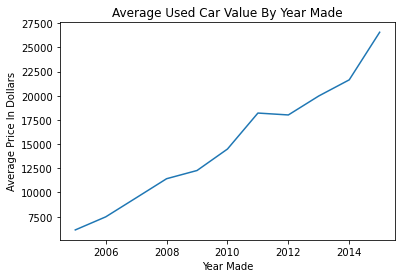

HTML(value='<br>')

In [17]:
## Function graphs the correlation between a car's selling/auction price in the dataset and when the car was manufactured. 

try:
    def graph_age_price_correlation():
        num_cars_per_year = []
        make_year = []
        price_holder = []
        price_average_year = []
        all_years = []
        year = 2005
        counter = 0
        total_value = 0
        while (year <= 2015):
            make_year = pd.DataFrame(car_prices[car_prices["year"] == year])
            price_holder = make_year["sellingprice"]

            for price in price_holder:
                total_value = total_value + price
                counter = counter + 1
            price_average_year.append(round(total_value/counter))
            all_years.append(int(year))
            counter = 0
            total_value = 0
            year = year + 1
        display(widgets.HTML("The average used car value by year made graph displays the average value of used cars"))
        display(widgets.HTML("from the dataset based on the year that they were made and the auction price they received."))
        display(widgets.HTML("The vast majority of car sales recorded in the dataset occurred between December of 2014"))
        display(widgets.HTML("and February of 2015."))    
        display(widgets.HTML("<br>"))
        plt.title("Average Used Car Value By Year Made")    
        plt.xlabel("Year Made")
        plt.ylabel("Average Price In Dollars") 
        plt.plot(all_years,price_average_year)
        plt.show()
        display(widgets.HTML("<br>"))   
except:
    logging.warning("Exception occured while graphing the car age-price correlation.")

In [18]:
## Function graphs the correlation between a car's selling/auction price in the dataset and the number of miles on the odometer.

try:
    def graph_odometer_price_correlation():
        avg_price = []
        odometer_vals = []
        odometer_start = 1
        odometer_end = 15000
        price_holder = np.array(car_prices["sellingprice"])
        odometer = np.array(car_prices["odometer"])
        while (odometer_end <= 151000):
            counter = 1
            total_val = 0

            odometer = pd.DataFrame(car_prices[car_prices["odometer"] >= odometer_start])
            odometer = pd.DataFrame(odometer[odometer["odometer"] <= odometer_end])                                   
            price_holder = odometer["sellingprice"]     

            for price in price_holder:
                total_val = total_val + price
                counter = counter + 1
            avg_price.append(total_val/counter)
            odometer_vals.append(odometer_end)
            odometer_start = odometer_start + 15000
            odometer_end = odometer_end + 15000
        display(widgets.HTML("The average used car value by miles on odometer graph displays the average value of used cars"))
        display(widgets.HTML("from the dataset based on the number of miles on the odometer and the auction price they received."))
        display(widgets.HTML("From the data, we can determine that a correlation exists between year made and miles on the odometer."))
        display(widgets.HTML("That is to say, the older a car is, the more likely it has been driven more miles and will have"))
        display(widgets.HTML("a lower valuation."))
        display(widgets.HTML("<br>"))
        plt.title("Average Used Car Value By Miles On Odometer")    
        plt.xlabel("Miles On Odometer")
        plt.ylabel("Average Price In Dollars") 
        plt.plot(odometer_vals,avg_price)
        plt.show()
        display(widgets.HTML("<br>"))
except:
    logging.warning("Exception occured while graphing the car odometer-price correlation.")

In [19]:
## Function graphs the price correlation between various manufacturers. 
## This is done to determine if any manufacturer in the dataset has, in general, more expensive or valuable vehicles.

try:
    def graph_make_price_correlation():
        brands = full_car_prices["Make"]
        brand_list = []
        price_holder = []
        price_list = []
        counter = 0
        total_value = 0
        brand_counter = []
        brand_df = full_car_prices.copy()
        for brand in brands:
            if brand not in brand_list:
                brand_list.append(brand)
        for make in brand_list:
            counter = 0
            for brand in brands:
                if brand == make:
                    counter = counter + 1
            brand_counter.append(counter)

        brand_count = pd.DataFrame(brand_list, columns=["brandname"])
        brand_count["counter"] = brand_counter
        brand_count = brand_count[brand_count["counter"] >10000]
        counter = 0
        for brand in brand_count["brandname"]:
            brand_df = brand_df[brand_df["Make"] == brand]
            for price in brand_df["sellingprice"]:
                total_value = total_value + price
                counter = counter + 1
            price_list.append(total_value/counter)
            total_value = 0
            counter = 0
            brand_df = full_car_prices.copy()
        display(widgets.HTML("The make-price correlation graph displays the average value of used cars based on manufacturer."))
        display(widgets.HTML("The data shows that most, but not all brands are, on average, about as costly as any other."))
        display(widgets.HTML("<br>"))
        plt.title("Average Used Car Value By Brand")    
        plt.xlabel("Brand")
        plt.ylabel("Average Price In Dollars") 
        plt.bar(brand_count["brandname"],price_list)
        plt.show()
        display(widgets.HTML("<br>"))
except:
    logging.warning("Exception occured while graphing the car make-price correlation.")

In [20]:
%%capture captured
## Function captures the output for the graphing functions to be displayed later, upon successful login.


try:
    def run_app():
        graph_age_price_correlation()
        graph_odometer_price_correlation()
        graph_make_price_correlation()   
    run_app()
except:
    logging.warning("Exception occured while running the graphing functions and capturing their output.")

In [21]:
## Function converts user input into a numeric data format for use with the RFR algorithm/model created previously.
## The user input is checked against the dataset that maintains the correlation between the various car makes 
## and their numeric representation. If the user input make value is already in the dataset, 
## then it is converted to its numeric representation. Otherwise, it is given a number value one greater 
## than any that currently exist in the dataset. This is done so that it is uniquely represented. 
## Jupyter cells 21-25 here perform the same function for the various string/text data columns.

try:
    def check_full_car_prices_make(make):
        temp_df = full_car_prices.copy()
        make_number_array = temp_df["make"]
        make_name_array = temp_df["Make"]
        highest_val = 0
        make = str(make).capitalize()
        for val in make_name_array:
            if val == make:
                in_list = True
                break
            else:
                in_list = False
        if in_list == True:
            temp_df = temp_df[temp_df["Make"] == make]
            make_array = np.array(temp_df["make"])
            make = make_array[0]
        else:
            for val in make_number_array:
                if val > highest_val:
                    highest_val = val
            highest_val = highest_val + 1
            make = highest_val
        return make
except:
    logging.warning("Exception occured while checking if the user input make value is already in the car prices dataset.")

In [22]:
try:
    def check_full_car_prices_model(model):
        temp_df = full_car_prices.copy()
        model_number_array = temp_df["model"]
        model_name_array = temp_df["Model"]
        highest_val = 0
        model = str(model).capitalize()
        for val in model_name_array:
            if val == model:
                in_list = True
                break
            else: 
                in_list = False
        if in_list == True:
            temp_df = temp_df[temp_df["Model"] == model]
            model_array = np.array(temp_df["model"])
            model = model_array[0]
        else:
            for val in model_number_array:
                if val > highest_val:
                    highest_val = val
            highest_val = highest_val + 1
            model = highest_val
        return model
except:
    logging.warning("Exception occured while checking if the user input model value is already in the car prices dataset.")

In [23]:
try:
    def check_full_car_prices_color(color):
        temp_df = full_car_prices.copy()
        color_number_array = temp_df["color"]
        color_name_array = temp_df["Color"]
        highest_val = 0
        for val in color_name_array:
            if val == color:
                in_list = True
                break
            else: 
                in_list = False
        if in_list == True:
            temp_df = temp_df[temp_df["Color"] == color]
            color_array = np.array(temp_df["color"])
            color = color_array[0]
        else:
            for val in color_number_array:
                if val > highest_val:
                    highest_val = val
            highest_val = highest_val + 1
            color = highest_val
        return color
except:
    logging.warning("Exception occured while checking if the user input color value is already in the car prices dataset.")

In [24]:
try:
    def check_full_car_prices_transmission(transmission):
        temp_df = full_car_prices.copy()
        transmission_number_array = temp_df["transmission"]
        transmission_name_array = temp_df["Transmission"]
        highest_val = 0
        for val in transmission_name_array:
            if val == transmission:
                in_list = True
                break
            else: 
                in_list = False
        if in_list == True:
            temp_df = temp_df[temp_df["Transmission"] == transmission]
            transmission_array = np.array(temp_df["transmission"])
            transmission = transmission_array[0]
        else:
            for val in transmission_number_array:
                if val > highest_val:
                    highest_val = val
            highest_val = highest_val + 1
            transmission = highest_val
        return transmission
except:
    logging.warning("Exception occured while transforming the user selected transmission value into a numeric data type.")

In [25]:
try:
    def check_full_car_prices_state(state):
        state = str(state).lower()
        temp_df = full_car_prices.copy()
        state_number_array = temp_df["state"]
        state_name_array = temp_df["State"]
        highest_val = 0
        for val in state_name_array:
            if val == state:
                in_list = True
                break
            else: 
                in_list = False
        if in_list == True:
            temp_df = temp_df[temp_df["State"] == state]
            state_array = np.array(temp_df["state"])
            state = state_array[0]
        else:
            for val in state_number_array:
                if val > highest_val:
                    highest_val = val
            highest_val = highest_val + 1
            state = highest_val
        return state
except:
    logging.warning("Exception occured while transforming the user selected state value into a numeric data type.")

In [26]:
## Create the visual elements that allow a user to input data into the program. Further, take the data input from the user and
## run it through the RFR model created earlier using its prediction function to return an estimated value based on the input 
## parameters. 

try:
    center_layout = widgets.Layout(height = "125px", width = "50%", align_items='center')
    year_box = widgets.Text(placeholder = "Year Made", layout= widgets.Layout(height = "45px", width = "12%"))
    make_box = widgets.Text(placeholder = "Car Make",layout= widgets.Layout(height = "45px", width = "12%"))
    model_box = widgets.Text(placeholder = "Car Model",layout= widgets.Layout(height = "45px", width = "12%"))
    transmission_box = widgets.Dropdown(options = ["Automatic", "Manual"], layout= widgets.Layout(height = "28px", width = "12%"))
    state_box = widgets.Dropdown(options = ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "IA", "ID",  
                                            "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT",  
                                            "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "PR", "RI",
                                            "SC", "SD", "TN","TX", "UT", "VA", "VI", "VT", "WA", "WI", "WV", "WY"], 
                                 placeholder= "State", layout= widgets.Layout(height = "28px", width = "12%"))
    condition_box = widgets.Dropdown(placeholder = "Condition", options = [5,4,3,2,1],
                                     layout= widgets.Layout(height = "28px", width = "12%"))
    odometer_box = widgets.Text(placeholder = "Odometer",layout= widgets.Layout(height = "45px", width = "12%"))
    color_box = widgets.Text(placeholder = "Color",layout= widgets.Layout(height = "45px", width = "12%"))
    mmr_box = widgets.Text(placeholder = "Bluebook",layout= widgets.Layout(height = "45px", width = "12%"))
    price_button = widgets.Button(description="Predict Price",tooltip="send")
    output1 = widgets.Output()
    def input_function():
        label_one = widgets.Text(value = "State", disabled = True, layout= widgets.Layout(height = "45px", width = "12%"))
        label_two = widgets.Text(value = "Condition", disabled = True, layout= widgets.Layout(height = "45px", width = "12%"))
        label_three = widgets.Text(value = "Transmission", disabled = True, layout= widgets.Layout(height = "45px", width = "12%"))
        grouped_cols_1 = widgets.HBox([year_box, make_box, model_box, color_box])
        grouped_labels_1 = widgets.HBox([label_one, label_two, label_three, mmr_box])
        grouped_cols_2 = widgets.HBox([state_box, condition_box, transmission_box, odometer_box])
        button_box = widgets.HBox([price_button])
        grouped_boxes = widgets.VBox([grouped_cols_1,grouped_labels_1,grouped_cols_2, button_box], layout = center_layout)
        display(widgets.HTML("<h3>Evaluate Used Car Values</h3>"))
        display(widgets.HTML("The used car evaluation function below estimates the value of a used car based on input parameters. "))
        display(widgets.HTML(""))
        
        display(grouped_cols_1)
        display(grouped_labels_1)
        display(grouped_cols_2)
        display(price_button)
except:
    logging.warning("Exception occured while creating the interactive query interface.")

def predict_used_car_sale_price(event):
    with output1:
        clear_output()
        if (year_box.value != "" and make_box.value != "" and model_box.value != "" and 
            color_box.value != "" and odometer_box.value != "" and mmr_box.value != ""):
            try:
                year_check = True
                year = year_box.value
                year = int(year)
            except ValueError:
                year_check = False
                logging.warning("Exception occured while changing the user input year value into an integer.")
            if year_check == True and year >= 1920 and year <= datetime.datetime.today().year:   
                try:    
                    make = make_box.value   
                    model = model_box.value
                    transmission = transmission_box.value
                    transmission = check_full_car_prices_transmission(transmission)
                    state = state_box.value
                    state = check_full_car_prices_state(state)
                    condition = condition_box.value
                    condition = float(condition)
                    color = color_box.value
                    odometer = odometer_box.value
                    odometer = float(odometer)
                    odometer_check = True
                except ValueError:
                    display(widgets.HTML("<br>"))
                    print("Please input a valid odometer value.")   
                    display(widgets.HTML("<br><br>"))
                    logging.warning("Exception occured while changing the user input odometer value into a float.")
                    odometer_check = False
                if odometer_check == True:
                    try:
                        make = check_full_car_prices_make(make)
                        model = check_full_car_prices_model(model)
                        color = check_full_car_prices_color(color)
                        mmr = mmr_box.value
                        mmr = int(mmr)
                        mmr_check = True
                    except ValueError:
                        display(widgets.HTML("<br>"))
                        print("Please enter a valid kelly bluebook value.")
                        logging.warning("Exception occured while changing the user input mmr value into an integer.")
                        display(widgets.HTML("<br><br>"))
                        mmr_check = False
                    if mmr_check == True:
                        try:
                            display(widgets.HTML("<br>"))
                            temp_df = car_prices.copy()
                            n = 0
                            temp_df = temp_df[:n]
                            del temp_df["sellingprice"]
                            temp_df = temp_df.append({"year":year, "make":make,"model":model, "transmission":transmission,
                                                      "state":state, "condition":condition, "odometer": odometer, "color":color,
                                                      "mmr":mmr}, ignore_index=True)
                            x = np.array(temp_df)
                            predicted_price = regression_model.predict(x)
                            predicted_price = round(predicted_price[0])
                            time = datetime.datetime.now()
                            offset = int(time.year) - 2015
                            inflation = (offset * 2.33)/100
                            predicted_price = round((predicted_price * inflation) + predicted_price)
                            year = str(year_box.value)
                            make = make_box.value   
                            model = model_box.value
                            state = state_box.value
                            transmission = transmission_box.value
                            condition = str(condition_box.value)
                            color = color_box.value
                            odometer = str(odometer_box.value)
                            mmr = str(mmr_box.value)
                            logging.warning("Prediction function was run with the following values: Year: " + year + ", Make: " + 
                                          make + ", model: " + model + ", Transmission: " + transmission + ", State "  + state
                                           + ", Condition" + condition + ", Odometer " + odometer +  ", Color " + color +
                                          ", mmr " + mmr + "." + " Function returned value was: " + str(predicted_price) + ".")

                            print("The estimated value of a " + year + " " + make + " " + model + 
                                  ", based on input parameters is: $" + str(predicted_price) + ".")
                        except:
                            logging.warning("Exception occured while predicting the value of a used car for a user.")
            else:
                display(widgets.HTML("<br>"))
                print("Please input a valid year")
                display(widgets.HTML("<br><br>"))
        else:
            display(widgets.HTML("<br>"))
            print("Please input valid data into all required fields.")
            display(widgets.HTML("<br><br>"))

In [27]:
## Create a login page that then displays the full application upon successful login. Also, ties together various aspects of 
## the program as well as creating text, headings and various visual and aesthetic elements.
center_layout = widgets.Layout(align_items = "center")
center_layout.min_height = "40px"
username = widgets.Text(placeholder="Username", layout = widgets.Layout(height="35px", width = "150px"))
password = widgets.Password(placeholder="Password", layout = widgets.Layout(height="35px", width = "150px"))
login_button = widgets.Button(description="Log In",tooltip="send")
heading1 = widgets.HTML("<h1>C964 Capstone Project<h1>")
heading2 = widgets.HTML("<h3>Welcome! Please sign in.<h3>")
error_message1 = widgets.HTML("Username or password is incorrect. Please input a valid username and password.", 
                              layout = center_layout)
output2 = widgets.Output()
def button_clicked(event):
    with output2:
        clear_output()                   
        if username.value == "admin" and password.value == "admin":
            logging.warning("User " + username.value + " logged in.")
            username.close()
            password.close()
            login_button.close()
            heading1.close()
            heading2.close()
            display(widgets.HTML("<h1>Used Car Price Evaluator</h1>"))
            display(widgets.HTML("<h3>Data Visualizations</h3>"))
            captured()
            determine_feature_importance_fast()
            input_function()
            price_button.on_click(predict_used_car_sale_price)
        else:
            display(widgets.VBox([error_message1], layout = center_layout))
login_button.on_click(button_clicked)  
log_in = widgets.VBox([heading1, heading2, username, password, login_button], layout = widgets.Layout(align_items= "center"))
display(log_in)
show_result = widgets.VBox([output2], layout = center_layout)
display(show_result)
show_result2 = widgets.VBox([output1], layout = center_layout)
display(show_result2)